Test VAE model on random frame of random file in `record`

In [30]:
import numpy as np
import os
import json
import tensorflow as tf
import random
from vae.vae import ConvVAE, reset_graph

In [31]:
import matplotlib.pyplot as plt
np.set_printoptions(precision=4, edgeitems=6, linewidth=100, suppress=True)

In [32]:
os.environ["CUDA_VISIBLE_DEVICES"]="-1" # disable GPU

DATA_DIR = "record"
model_path_name = "vae"

z_size=32

In [33]:
filelist = os.listdir(DATA_DIR)

In [34]:
obs = np.load(os.path.join(DATA_DIR, random.choice(filelist)))["obs"]
# obs = obs.astype(np.float32)/255.0

In [38]:
obs = obs.astype(np.float32)

In [39]:
obs[0]

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0

In [27]:
frame = random.choice(obs).reshape(1, 64, 64, 3)

In [8]:
vae = ConvVAE(z_size=z_size,
              batch_size=1,
              is_training=False,
              reuse=False,
              gpu_mode=False)

vae.load_json(os.path.join(model_path_name, 'vae.json'))

INFO:tensorflow:Model using cpu.


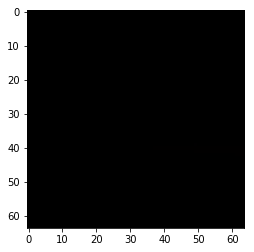

In [28]:
# show recorded frame that will be fed into the input of VAE
plt.imshow(frame[0])
plt.show()

In [29]:
frame[0].mean()

0.0038248697916666665

In [10]:
batch_z = vae.encode(frame)
print(batch_z[0]) # print out sampled z
reconstruct = vae.decode(batch_z)

[-0.813  -0.6701 -0.8406  0.311  -1.1316  0.2847  0.1384  0.0632 -0.4295 -0.7332  0.2955  1.1269
 -0.1371  1.1135 -1.327  -0.5261 -0.1454 -0.0149  0.9023  0.9829 -0.8376  0.0435 -0.5201 -1.7498
 -0.7868 -0.9019 -0.0312 -3.5862 -2.3489  1.6846  0.1214 -0.2492]


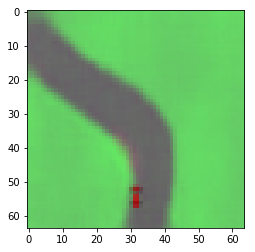

In [11]:
# show reconstruction
plt.imshow(reconstruct[0])
plt.show()